In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. Load dataset and apply Logistic Regression
def logistic_regression_basic():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model Accuracy:", accuracy_score(y_test, y_pred))

# 2. Logistic Regression with L1 Regularization
def logistic_regression_l1():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
    model.fit(X_train, y_train)
    print("Model Accuracy with L1:", model.score(X_test, y_test))

# 3. Logistic Regression with L2 Regularization
def logistic_regression_l2():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)
    model.fit(X_train, y_train)
    print("Model Accuracy with L2:", model.score(X_test, y_test))
    print("Coefficients:", model.coef_)

# 4. Logistic Regression with Elastic Net Regularization
def logistic_regression_elastic_net():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
    model.fit(X_train, y_train)
    print("Model Accuracy with Elastic Net:", model.score(X_test, y_test))

# 5. Logistic Regression for Multiclass Classification
def logistic_regression_multiclass():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
    model.fit(X_train, y_train)
    print("Multiclass Model Accuracy:", model.score(X_test, y_test))

# 6. Hyperparameter tuning using GridSearchCV
def logistic_regression_grid_search():
    iris = load_iris()
    X, y = iris.data, iris.target
    param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs']}
    grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

# 7. Stratified K-Fold Cross-Validation
def logistic_regression_cross_val():
    iris = load_iris()
    X, y = iris.data, iris.target
    model = LogisticRegression(max_iter=200)
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print("Average Accuracy with Stratified K-Fold:", np.mean(scores))

# 8. Load dataset from CSV and apply Logistic Regression
def logistic_regression_from_csv(file_path):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1].values  # Assuming last column is target
    y = df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    print("CSV Model Accuracy:", model.score(X_test, y_test))


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.004832930238571752}
Accuracy: 0.825
OVO Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


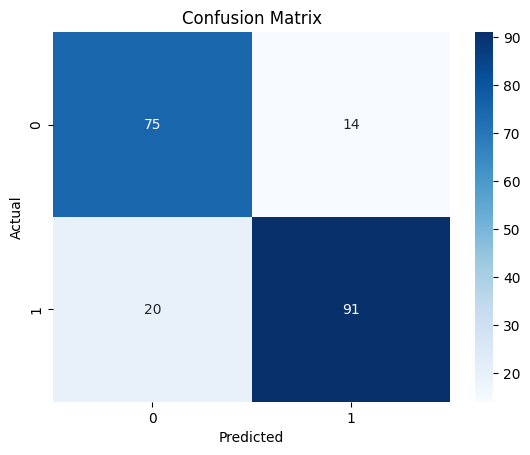

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Accuracy: 0.825
Titanic Accuracy: 0.7297297297297297
Scaled Accuracy: 0.83
ROC-AUC Score: 0.9126429800587104
Loaded Model Accuracy: 0.83


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             cohen_kappa_score, matthews_corrcoef)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import load_iris, make_classification
import joblib

# 9. Hyperparameter tuning using RandomizedSearchCV
def tune_logistic_regression():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_dist = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
    model = LogisticRegression()
    search = RandomizedSearchCV(model, param_dist, scoring='accuracy', cv=5, n_iter=10, random_state=42)
    search.fit(X_train, y_train)
    print("Best Parameters:", search.best_params_)
    print("Accuracy:", accuracy_score(y_test, search.best_estimator_.predict(X_test)))

tune_logistic_regression()

# 10. One-vs-One (OVO) Multiclass Logistic Regression
def ovo_multiclass_logistic():
    X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500)
    model.fit(X_train, y_train)
    print("OVO Accuracy:", accuracy_score(y_test, model.predict(X_test)))

ovo_multiclass_logistic()

# 11. Confusion Matrix for binary classification
def logistic_confusion_matrix():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

logistic_confusion_matrix()

# 12. Evaluate using Precision, Recall, F1-score
def evaluate_precision_recall_f1():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print(classification_report(y_test, model.predict(X_test)))

evaluate_precision_recall_f1()

# 13. Handle imbalanced data using class weights
def logistic_with_class_weights():
    X, y = make_classification(n_samples=1000, weights=[0.1, 0.9], random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)
    print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

logistic_with_class_weights()

# 14. Train Logistic Regression on Titanic dataset
def logistic_on_titanic():
    df = sns.load_dataset('titanic').dropna()
    X = pd.get_dummies(df[['pclass', 'sex', 'age']], drop_first=True)
    y = df['survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print("Titanic Accuracy:", accuracy_score(y_test, model.predict(X_test)))

logistic_on_titanic()

# 15. Feature scaling and comparison
def logistic_with_scaling():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    print("Scaled Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

logistic_with_scaling()

# 16. ROC-AUC Score
def logistic_roc_auc():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

logistic_roc_auc()

# 25. Save and load model using joblib
def save_and_load_model():
    X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    joblib.dump(model, 'logistic_model.pkl')
    loaded_model = joblib.load('logistic_model.pkl')
    print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

save_and_load_model()
